In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the Citipy module to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | meulaboh
Processing Record 4 of Set 1 | sao joao da boa vista
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | hualmay
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | gavrilov-yam
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | henties bay
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | caxito
Processing Record 17 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | dolores
Processing Record 20 of Set 1 | bluff
Processing Record 21 of 

Processing Record 36 of Set 4 | longyearbyen
Processing Record 37 of Set 4 | lalibela
Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | okmulgee
Processing Record 40 of Set 4 | shaunavon
Processing Record 41 of Set 4 | tefe
Processing Record 42 of Set 4 | pasni
Processing Record 43 of Set 4 | namie
Processing Record 44 of Set 4 | wattegama
Processing Record 45 of Set 4 | verkhnevilyuysk
Processing Record 46 of Set 4 | yerbogachen
Processing Record 47 of Set 4 | vila
Processing Record 48 of Set 4 | miramar
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | ust-ishim
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | hokitika
Processing Record 3 of Set 5 | kapaa
Processing Record 4 of Set 5 | erenhot
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | puerto montt
Processing Record 8 of Set 5 | blytheville
Processing Rec

Processing Record 29 of Set 8 | ponta grossa
Processing Record 30 of Set 8 | college
Processing Record 31 of Set 8 | nova granada
Processing Record 32 of Set 8 | igarka
Processing Record 33 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 34 of Set 8 | gizo
Processing Record 35 of Set 8 | kearney
Processing Record 36 of Set 8 | takhtamygda
Processing Record 37 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 8 | ikole
City not found. Skipping...
Processing Record 39 of Set 8 | la tuque
Processing Record 40 of Set 8 | praia
Processing Record 41 of Set 8 | kaduqli
Processing Record 42 of Set 8 | novikovo
Processing Record 43 of Set 8 | sabang
Processing Record 44 of Set 8 | grand forks
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | nouadhibou
Processing Record 47 of Set 8 | tocopilla
Processing Record 48 of Set 8 | aracati
Processing Record 49 of Set 8 | bijar
Processing Record 50 of Set 8 | andros town
Processing Reco

Processing Record 14 of Set 12 | kudahuvadhoo
Processing Record 15 of Set 12 | boguchany
Processing Record 16 of Set 12 | quatre cocos
Processing Record 17 of Set 12 | nago
Processing Record 18 of Set 12 | amarpur
Processing Record 19 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 20 of Set 12 | uzhur
Processing Record 21 of Set 12 | plettenberg bay
Processing Record 22 of Set 12 | west odessa
Processing Record 23 of Set 12 | ust-kut
Processing Record 24 of Set 12 | san quintin
Processing Record 25 of Set 12 | pelotas
Processing Record 26 of Set 12 | saint-georges
Processing Record 27 of Set 12 | langham
Processing Record 28 of Set 12 | nishihara
Processing Record 29 of Set 12 | fairmont
Processing Record 30 of Set 12 | alofi
Processing Record 31 of Set 12 | dayong
Processing Record 32 of Set 12 | san carlos
Processing Record 33 of Set 12 | sibolga
Processing Record 34 of Set 12 | nhulunbuy
Processing Record 35 of Set 12 | aykhal
Processing Record 36 of Set 12 

In [10]:
len(city_data)

576

In [11]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,77.07,67,100,5.99,PF,2020-04-20 00:49:27
1,Hilo,19.73,-155.09,82.40,51,20,13.87,US,2020-04-20 00:49:27
2,Meulaboh,4.14,96.13,79.21,84,68,4.83,ID,2020-04-20 00:49:27
3,Sao Joao Da Boa Vista,-21.97,-46.80,62.60,93,62,2.24,BR,2020-04-20 00:49:27
4,Mataura,-46.19,168.86,57.99,60,72,5.99,NZ,2020-04-20 00:49:28
5,Vaini,-21.20,-175.20,84.20,70,20,10.29,TO,2020-04-20 00:49:28
6,Hithadhoo,-0.60,73.08,84.78,75,94,10.04,MV,2020-04-20 00:49:28
7,Hualmay,-11.10,-77.61,70.72,76,8,7.70,PE,2020-04-20 00:49:28
8,Saskylakh,71.92,114.08,17.15,95,2,3.60,RU,2020-04-20 00:48:25
9,Gavrilov-Yam,57.30,39.85,26.60,100,75,2.44,RU,2020-04-20 00:49:29


In [12]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-04-20 00:49:27,-23.12,-134.97,77.07,67,100,5.99
1,Hilo,US,2020-04-20 00:49:27,19.73,-155.09,82.40,51,20,13.87
2,Meulaboh,ID,2020-04-20 00:49:27,4.14,96.13,79.21,84,68,4.83
3,Sao Joao Da Boa Vista,BR,2020-04-20 00:49:27,-21.97,-46.80,62.60,93,62,2.24
4,Mataura,NZ,2020-04-20 00:49:28,-46.19,168.86,57.99,60,72,5.99
...,...,...,...,...,...,...,...,...,...
571,Caxambu,BR,2020-04-20 00:51:25,-21.98,-44.93,58.69,70,88,2.39
572,Sinnamary,GF,2020-04-20 00:51:25,5.38,-52.95,79.72,85,98,15.68
573,Lariano,IT,2020-04-20 00:51:26,41.72,12.82,61.00,84,100,1.01
574,Santiago De Cao,PE,2020-04-20 00:51:26,-7.96,-79.24,73.40,75,2,8.61


In [13]:
# Import the time module
import time
#Get today's date in seconds
today = time.time()
today

1587343886.671697

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
today = time.strftime("%x")
today

'04/19/20'

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

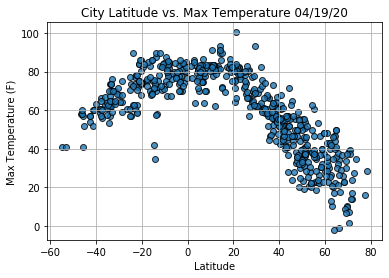

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


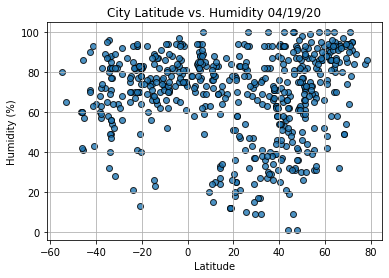

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

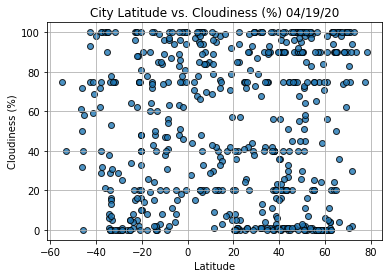

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

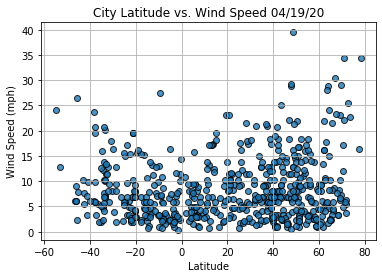

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                   Nanortalik
Country                        GL
Date          2020-04-20 00:49:30
Lat                         60.14
Lng                        -45.24
Max Temp                     28.4
Humidity                       89
Cloudiness                      6
Wind Speed                   9.46
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
571    False
572     True
573     True
574    False
575     True
Name: Lat, Length: 576, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2020-04-20 00:49:27,19.73,-155.09,82.40,51,20,13.87
2,Meulaboh,ID,2020-04-20 00:49:27,4.14,96.13,79.21,84,68,4.83
8,Saskylakh,RU,2020-04-20 00:48:25,71.92,114.08,17.15,95,2,3.60
9,Gavrilov-Yam,RU,2020-04-20 00:49:29,57.30,39.85,26.60,100,75,2.44
11,Dikson,RU,2020-04-20 00:49:30,73.51,80.55,34.48,89,90,22.77


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2020-04-20 00:49:27,19.73,-155.09,82.40,51,20,13.87
2,Meulaboh,ID,2020-04-20 00:49:27,4.14,96.13,79.21,84,68,4.83
8,Saskylakh,RU,2020-04-20 00:48:25,71.92,114.08,17.15,95,2,3.60
9,Gavrilov-Yam,RU,2020-04-20 00:49:29,57.30,39.85,26.60,100,75,2.44
11,Dikson,RU,2020-04-20 00:49:30,73.51,80.55,34.48,89,90,22.77


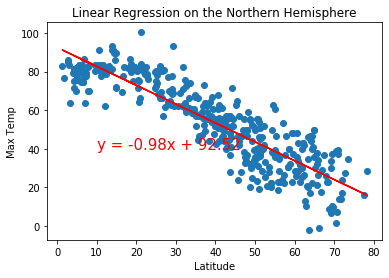

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere //n for Maximum Temperature', 'Max Temp',(10,40))


In [47]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-04-20 00:49:27,-23.12,-134.97,77.07,67,100,5.99
3,Sao Joao Da Boa Vista,BR,2020-04-20 00:49:27,-21.97,-46.80,62.60,93,62,2.24
4,Mataura,NZ,2020-04-20 00:49:28,-46.19,168.86,57.99,60,72,5.99
5,Vaini,TO,2020-04-20 00:49:28,-21.20,-175.20,84.20,70,20,10.29
6,Hithadhoo,MV,2020-04-20 00:49:28,-0.60,73.08,84.78,75,94,10.04


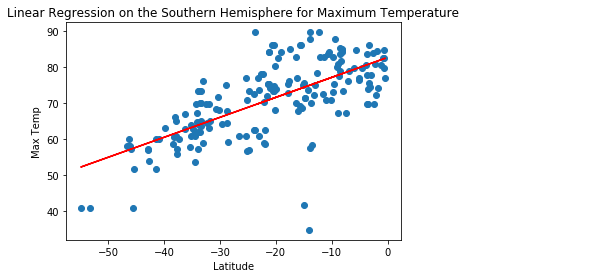

In [58]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere //n for Maximum Temperature', 'Max Temp',(10,40))


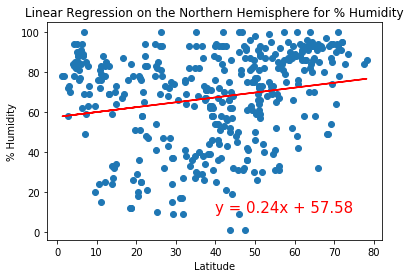

In [51]:
# To find the humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere //n for % Humidity', '% Humidity',(40,10))

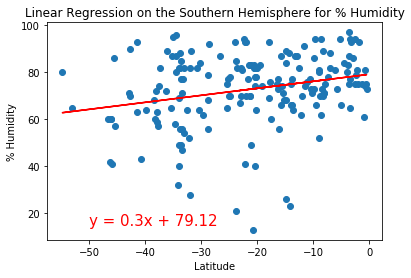

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere //n for % Humidity', '% Humidity',(-50,15))

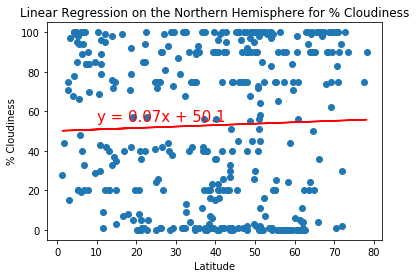

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere for % Cloudiness")
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere //n for % Cloudiness', '% Cloudiness',(10,55))

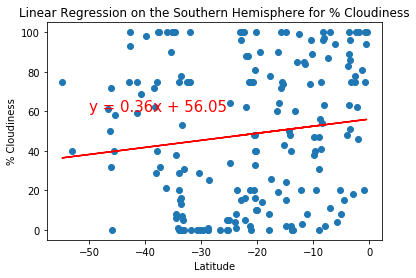

In [59]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere for % Cloudiness")
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Southern Hemisphere //n for % Cloudiness', '% Cloudiness',(-50,60))

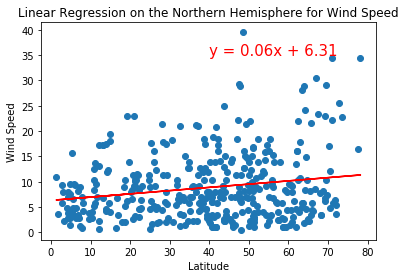

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Northern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere //n for Wind Speed', 'Wind Speed',(40,35))

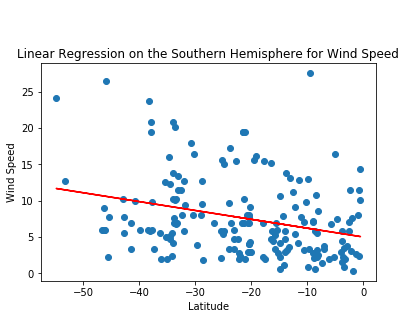

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Southern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere //n for Wind Speed', 'Wind Speed',(-50,35))